# 单突变数据库[ProThermDB-single MPTherm-pred]

In [1]:
import json
import os
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import tqdm
from sklearn.model_selection import train_test_split

# 0.data preprocessing functions

In [2]:
from Process4Dataset.initializor4PonDT import wash4MutTm, check4mult, duplicate4MutTm, delete4Dup, select4Dup

# Tm——关注蛋白质解链温度

In [3]:
columns = ["UniProt_ID", "Mutation", "Tm"]

## 1.ProThermDB

In [4]:
ProThermDB = pd.read_csv("BasicData/InitializationDataset/ProThermDB.tsv", sep="\t")[columns + ["ΔTm"]]
ProThermDB.sort_values(by=columns, inplace=True, ascending=False)
ProThermDB.reset_index(drop=True, inplace=True)
ProThermDB

,UniProt_ID,Mutation,Tm,ΔTm
0,W0TJ64,S176A (Based on Uniprot),-,80.4
1,W0TJ64,S176A (Based on Uniprot),-,78.2
2,W0TJ64,S176A (Based on Uniprot),-,78.4
3,W0TJ64,S176A (Based on Uniprot),-,79.8
4,W0TJ64,S176A (Based on Uniprot),-,80.4
...,...,...,...,...
9731,-,-,-,-
9732,-,-,-,-
9733,-,-,-,-
9734,-,-,-,-


### 1.1清洗数据[利用DatasetCreator4MutTm]

In [5]:
ProThermDB, ProThermDB_washed = wash4MutTm(ProThermDB, avg_filling=True, focus_columns=columns)
ProThermDB_washed

-删除数据缺失行及非法行共计4502行
-补全pH/Tm的缺失值 -利用PonStab2.0对蛋白质序列的Tm进行预测补全...暂时未进行，因此对所有Tm缺失条目进行删除
-由于热稳定性预测工具未完善，Tm的补全措施取消，剔除所有非法Tm


,UniProt_ID,Mutation,Tm,ΔTm
10,S4WCF9,V571L (Based on UniProt),81,-
11,S4WCF9,V571L (Based on UniProt),72,-
12,S4WCF9,T586I (Based on UniProt),95,-
13,S4WCF9,L558S (Based on UniProt),73,-
14,S4WCF9,L558S (Based on UniProt),51,-
...,...,...,...,...
9731,-,-,-,-
9732,-,-,-,-
9733,-,-,-,-
9734,-,-,-,-


### 1.2.检测是否存在多测量值

In [6]:
ProThermDB_mult_cnt, ProThermDB_mult_index = check4mult(ProThermDB, columns)
ProThermDB_multiple_deltaTm = ProThermDB.iloc[ProThermDB_mult_index, :]
print(f"ProThermDB数据库中存在{ProThermDB_mult_cnt}条多测量值")

ProThermDB数据库中存在438条多测量值


### 1.3.针对多测量值进行处理

In [7]:
del_ProThermDB = duplicate4MutTm(ProThermDB, mode="Delete", focus_columns=columns).reset_index(drop=True)
avg_ProThermDB = duplicate4MutTm(ProThermDB, mode="Average", focus_columns=columns).reset_index(drop=True)
avg_ProThermDB

,UniProt_ID,Mutation,Tm,ΔTm
0,A0A060GYS1,H22R,88.0,9.9
1,A0A060GYS1,P224R,84.3,2.3
2,A0A410ZNC6,A341S,33.6,3.6
3,A0A410ZNC6,F184L,31.0,1.0
4,A0A410ZNC6,P250L,34.5,4.5
...,...,...,...,...
4747,R9S082,T52A,79.4,-2.8
4748,R9S082,T68A,81.7,-0.5
4749,R9S082,V115A,79.3,-2.9
4750,R9S082,V14A,80.9,-1.3


### 1.4.绘制ProThermDB分布图

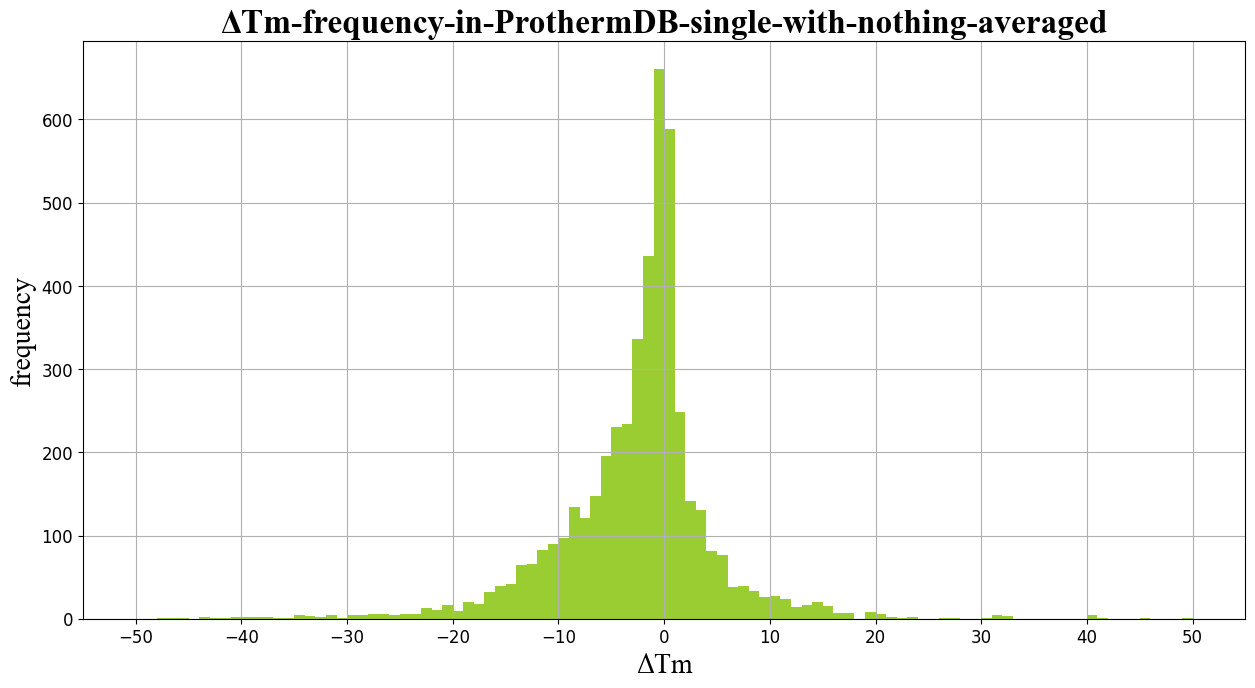

In [8]:
plt.figure(figsize=(15, 7.5), dpi=100)
plt.hist(avg_ProThermDB["ΔTm"].astype(float).sort_values(),
         bins=100,
         color="yellowgreen",
         range=(-50, 50))
plt.xlabel("ΔTm", size=18)
plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(10))

# 标题与坐标轴标签
plt.title("ΔTm-frequency-in-ProthermDB-single-with-nothing-averaged",
          loc="center",
          fontdict={"family" : "Times New Roman",
                    "size" : 24,
                    "weight" : "bold"})
plt.xlabel("ΔTm", fontdict={"family" : "Times New Roman", "size" : 20, "weight" : "normal"})
plt.ylabel("frequency", fontdict={"family" : "Times New Roman", "size" : 20, "weight" : "normal"})

plt.xticks(size=12)
plt.yticks(size=12)
plt.rcParams["axes.facecolor"] = "white"
plt.grid()
plt.show()

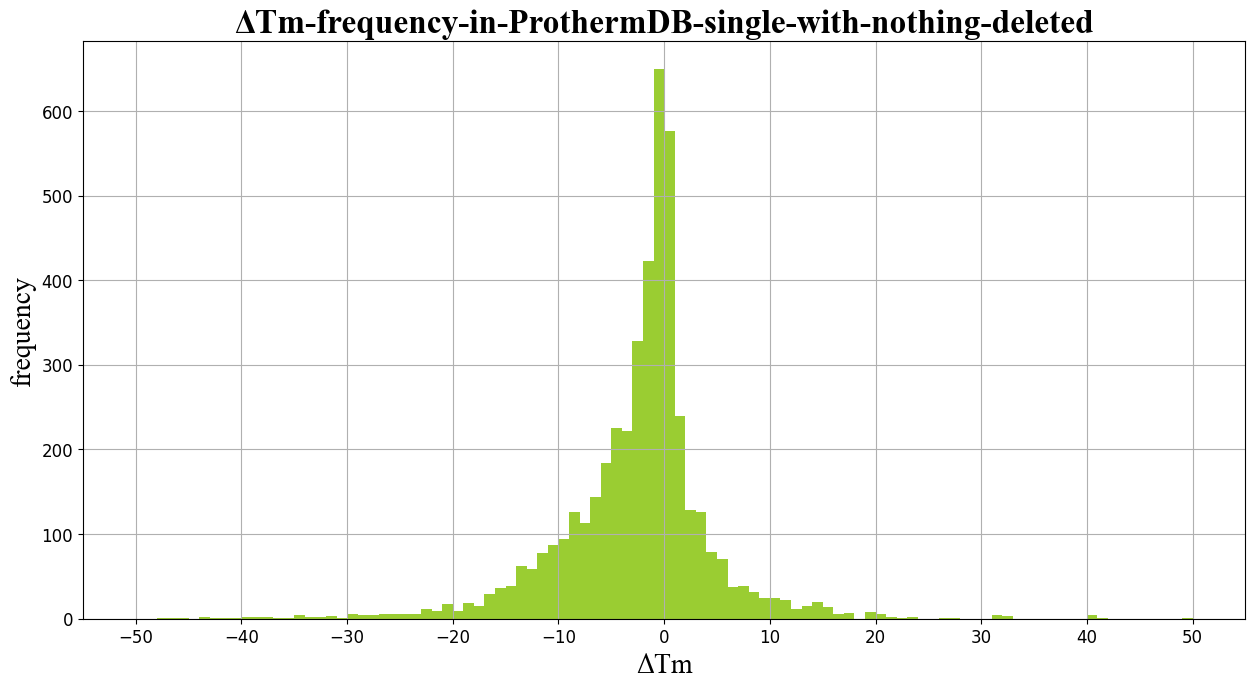

In [9]:
plt.figure(figsize=(15, 7.5), dpi=100)
plt.hist(del_ProThermDB["ΔTm"].astype(float).sort_values(),
         bins=100,
         color="yellowgreen",
         range=(-50, 50))
plt.xlabel("ΔTm", size=18)
plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(10))

# 标题与坐标轴标签
plt.title("ΔTm-frequency-in-ProthermDB-single-with-nothing-deleted",
          loc="center",
          fontdict={"family" : "Times New Roman",
                    "size" : 24,
                    "weight" : "bold"})
plt.xlabel("ΔTm", fontdict={"family" : "Times New Roman", "size" : 20, "weight" : "normal"})
plt.ylabel("frequency", fontdict={"family" : "Times New Roman", "size" : 20, "weight" : "normal"})

plt.xticks(size=12)
plt.yticks(size=12)
plt.rcParams["axes.facecolor"] = "white"
plt.grid()
plt.show()

## 2.MPTherm-pred[缺失Tm，不对其进行分析]

In [10]:
MPTherm_pred_Training = pd.read_csv("BasicData/MPTherm-pred/MPTherm-pred_Training.csv")
MPTherm_pred_Testing = pd.read_csv("BasicData/MPTherm-pred/MPTherm-pred_Testing.csv")

# 3.MPThermDB

In [11]:
MPThermDB = pd.read_csv("BasicData/InitializationDataset/MPThermDB.tsv", sep="\t")[columns + ["ΔTm"]]
MPThermDB.sort_values(by=columns, inplace=True, ascending=False)
MPThermDB.reset_index(drop=True, inplace=True)
MPThermDB

,UniProt_ID,Mutation,Tm,ΔTm
0,W8VZW3,Y83A,72,-2.0
1,W8VZW3,W72A,71,-3.0
2,W8VZW3,F15A,74,0.0
3,Q9Y6R1-2,R298S,43,-5.0
4,Q9Y277,C8A,66.7,1.7
...,...,...,...,...
1862,A0A0E3N843,C557S,51.8 (0.4),0.2
1863,A0A0C4MBH9,D404E,76.5 (1.2),-6.4
1864,A0A0C4MBH9,D404A,75.8 (0.9),-7.1
1865,A0A0C4MBH9,D146E,77.4 (0.8),-5.5


### 3.1.清洗MPThermDB中的非法数据

In [12]:
MPThermDB, MPThermDb_washed = wash4MutTm(MPThermDB, avg_filling=True, focus_columns=columns)
MPThermDb_washed

-删除数据缺失行及非法行共计117行
-补全pH/Tm的缺失值 -利用PonStab2.0对蛋白质序列的Tm进行预测补全...暂时未进行，因此对所有Tm缺失条目进行删除
-由于热稳定性预测工具未完善，Tm的补全措施取消，剔除所有非法Tm


,UniProt_ID,Mutation,Tm,ΔTm
5,Q9Y277,C8A,62.95,NaN
7,Q9Y277,C2A,66.9,NaN
12,Q9WTK1,S309A,43.5 (0.5),NaN
90,Q8WXF7,R77A,49,NaN
91,Q8WXF7,F151S,54,NaN
...,...,...,...,...
1799,E7CWP5,T586I,60,NaN
1801,E7CWP5,T582I,54,NaN
1802,E7CWP5,Q575I,47,NaN
1804,E7CWP5,Q565I,51,NaN


### 3.2.检测是否存在多测量值

In [13]:
MPThermDB_mult_cnt, MPThermDB_mult_index = check4mult(MPThermDB, columns)
MPThermDB_multiple_deltaTm = MPThermDB.iloc[MPThermDB_mult_index, :]
print(f"ProThermDB数据库中存在{MPThermDB_mult_cnt}条多测量值")
MPThermDB_multiple_deltaTm

ProThermDB数据库中存在46条多测量值


,UniProt_ID,Mutation,Tm,ΔTm
47,Q97UY8,G144A,72.8,0.3
48,Q97UY8,G144A,72.8,1.0
49,Q97UY8,E166Q,84.0,5.5
50,Q97UY8,E166Q,84.0,1.4
54,Q97UY8,E166Q,80.2,1.7
55,Q97UY8,E166Q,80.2,-2.4
65,Q97UY8,E166A,83.3,0.9
66,Q97UY8,E166A,83.3,4.8
67,Q97UY8,E166A,83.3,0.7
70,Q97UY8,E166A,79.9,-2.5


### 3.2.1.删除所有多测量值

### 3.2.2.平均所有多测量值

In [14]:
del_MPThermDB = duplicate4MutTm(MPThermDB, mode="Delete", focus_columns=columns).reset_index(drop=True)
avg_MPThermDB = duplicate4MutTm(MPThermDB, mode="Average", focus_columns=columns).reset_index(drop=True)
avg_MPThermDB

,UniProt_ID,Mutation,Tm,ΔTm
0,A0A0C4MBH9,D146A,77.6,-5.3
1,A0A0C4MBH9,D146E,77.4,-5.5
2,A0A0C4MBH9,D404A,75.8,-7.1
3,A0A0C4MBH9,D404E,76.5,-6.4
4,A0A0E3N843,C557S,51.8,0.2
...,...,...,...,...
1720,Q9Y277,C8A,66.7,1.7
1721,Q9Y6R1-2,R298S,43.0,-5.0
1722,W8VZW3,F15A,74.0,0.0
1723,W8VZW3,W72A,71.0,-3.0


### 3.3.针对不同多测量值策略进行数据分析

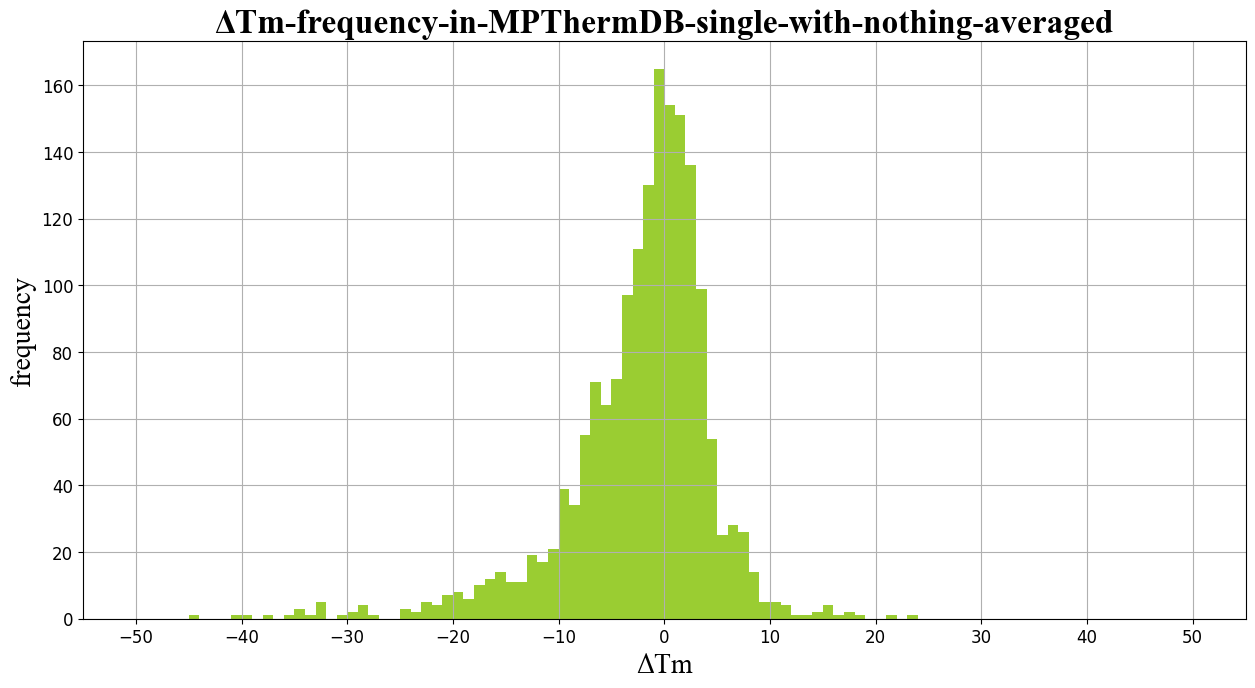

In [15]:
plt.figure(figsize=(15, 7.5), dpi=100)
plt.hist(avg_MPThermDB["ΔTm"].astype(float).sort_values(),
         bins=100,
         color="yellowgreen",
         range=(-50, 50))
plt.xlabel("ΔTm", size=18)
plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(10))

# 标题与坐标轴标签
plt.title("ΔTm-frequency-in-MPThermDB-single-with-nothing-averaged",
          loc="center",
          fontdict={"family" : "Times New Roman",
                    "size" : 24,
                    "weight" : "bold"})
plt.xlabel("ΔTm", fontdict={"family" : "Times New Roman", "size" : 20, "weight" : "normal"})
plt.ylabel("frequency", fontdict={"family" : "Times New Roman", "size" : 20, "weight" : "normal"})

plt.xticks(size=12)
plt.yticks(size=12)
plt.rcParams["axes.facecolor"] = "white"
plt.grid()
plt.show()

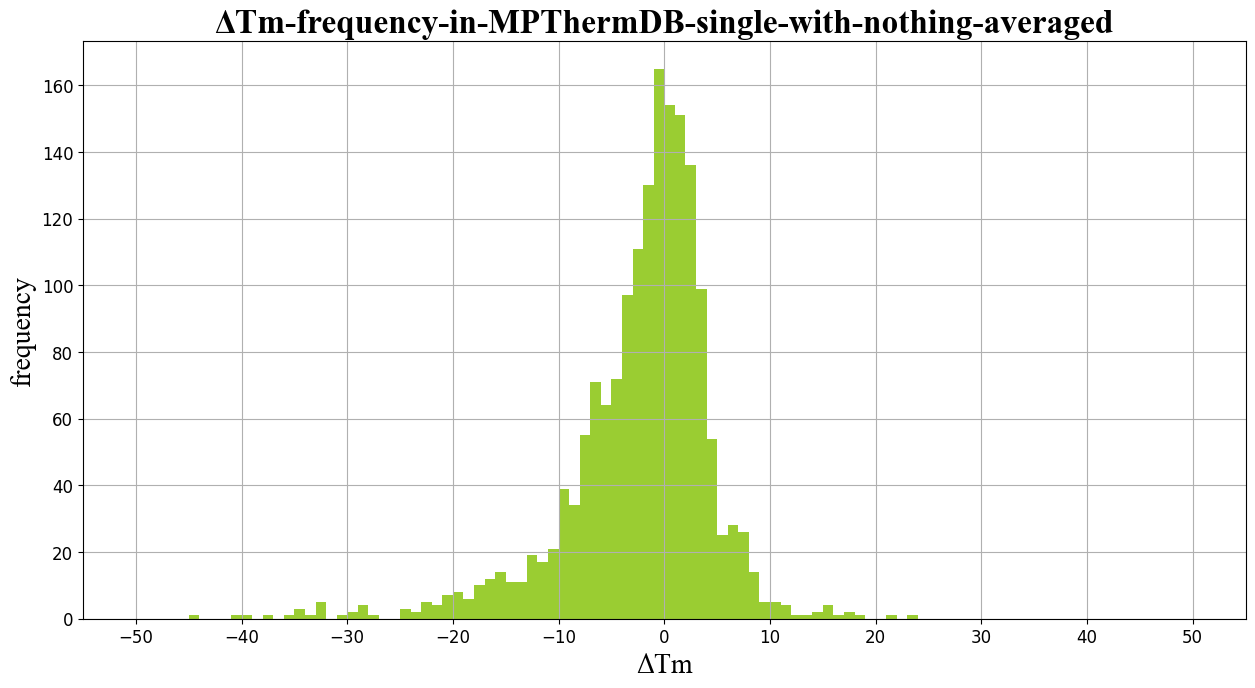

In [16]:
plt.figure(figsize=(15, 7.5), dpi=100)
plt.hist(avg_MPThermDB["ΔTm"].astype(float).sort_values(),
         bins=100,
         color="yellowgreen",
         range=(-50, 50))
plt.xlabel("ΔTm", size=18)
plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(10))

# 标题与坐标轴标签
plt.title("ΔTm-frequency-in-MPThermDB-single-with-nothing-averaged",
          loc="center",
          fontdict={"family" : "Times New Roman",
                    "size" : 24,
                    "weight" : "bold"})
plt.xlabel("ΔTm", fontdict={"family" : "Times New Roman", "size" : 20, "weight" : "normal"})
plt.ylabel("frequency", fontdict={"family" : "Times New Roman", "size" : 20, "weight" : "normal"})

plt.xticks(size=12)
plt.yticks(size=12)
plt.rcParams["axes.facecolor"] = "white"
plt.grid()
plt.show()

# 4.HotMuSiC

In [17]:
HotMusic = pd.read_csv("BasicData/InitializationDataset/HotMuSiC_source.csv")[["PDBid", "RESN", "RESwt", "RESmut", "Tm", "ΔTm"]]       # add Tm
pdb2uid_ref = json.load(open("./Process4Dataset/feature_extractor/IDConvert/pdb2uid.json", "r"))

# 由于该数据库的映射关系与其他数据库存在差异，先进行处理

In [18]:
# PDBid转换为UniProt ID
import tqdm
def get_uniprot_id(pdb_id):
    return pdb2uid_ref[pdb_id] if pdb_id in pdb2uid_ref else "None"

# MutationInfoTrasfer
ref = {"ALA": "A", "ARG": "R", "ASN": "N", "ASP": "D", "CYS": "C", "GLN": "Q", "GLU": "E", "GLY": "G", "HIS": "H", "ILE": "I", "LEU": "L", "LYS": "K", "MET": "M", "PHE": "F", "PRO": "P", "SER": "S", "THR": "T", "TRP": "W", "TYR": "Y", "VAL": "V"}
def part2Mutation(animo_acid_from, animo_acid_to, animo_acid_position):
    try:
        return f"{ref[animo_acid_from]}{int(animo_acid_position)}{ref[animo_acid_to]}"
    except Exception:
        return "Fault"

In [19]:
HotMusic.insert(loc=HotMusic.shape[1], column="Mutation", value="")
for rowIndex, row in HotMusic.iterrows():
    HotMusic.loc[rowIndex, "Mutation"] =  part2Mutation(row["RESwt"], row["RESmut"], row["RESN"])

In [20]:
HotMusic.insert(loc=HotMusic.shape[1], column="UniProt_ID", value="")
deleteIndex = []
with tqdm.tqdm(total=HotMusic.shape[0]) as pbar:
    for rowIndex, row in HotMusic.iterrows():
        uid = get_uniprot_id(row["PDBid"])
        if uid == "None":
            deleteIndex.append(rowIndex)
        else:
            HotMusic.loc[rowIndex, "UniProt_ID"] =  uid
        pbar.update(1)
print(f"HotMusic中删除了{len(deleteIndex)} / {HotMusic.shape[0]}条由于PDBid无法转换为UniPortID的数据")
HotMusic.drop(index=deleteIndex, inplace=True)

100%|██████████| 1627/1627 [00:00<00:00, 19137.25it/s]

HotMusic中删除了384 / 1627条由于PDBid无法转换为UniPortID的数据


In [21]:
HotMusic = HotMusic[columns + ["ΔTm"]]
HotMusic.sort_values(by=columns, inplace=True, ascending=False)
HotMusic.reset_index(drop=True, inplace=True)
HotMusic

,UniProt_ID,Mutation,Tm,ΔTm
0,Q9ZEU2,Y147N,47.8,-1.0
1,Q9ZEU2,Y147F,47.8,-0.2
2,Q9ZEU2,Y147A,47.8,-1.0
3,Q9ZEU2,R509A,47.8,0.0
4,Q9ZEU2,R446F,47.8,0.2
...,...,...,...,...
1238,D4Z2G1,A129V,51.0,-1.5
1239,A8PUY1,N277V,54.6,-13.5
1240,A8PUY1,N277L,54.6,-12.0
1241,A8PUY1,N277F,54.6,-16.3


### 4.1.清洗HotMusic中的非法数据

In [22]:
HotMusic, HotMusic_washed = wash4MutTm(HotMusic, avg_filling=True, focus_columns=columns)
HotMusic_washed

-删除数据缺失行及非法行共计2行
-补全pH/Tm的缺失值 -利用PonStab2.0对蛋白质序列的Tm进行预测补全...暂时未进行，因此对所有Tm缺失条目进行删除
-由于热稳定性预测工具未完善，Tm的补全措施取消，剔除所有非法Tm


,UniProt_ID,Mutation,Tm,ΔTm
44,Q9ZEU2,Fault,47.8,-0.2
1173,D4Z2G1,Fault,51.0,0.0


### 4.2.检测是否存在多测量值

In [23]:
HotMusic_mult_cnt, HotMusic_mult_index = check4mult(HotMusic, columns)
HotMusic_multiple_deltaTm = HotMusic.iloc[HotMusic_mult_index, :]
print(f"HotMuSiC数据库中存在{HotMusic_mult_cnt}条多测量值")

HotMuSiC数据库中存在12条多测量值


### 4.3.对多测量值进行处理

In [24]:
del_HotMusic = duplicate4MutTm(HotMusic, mode="Delete", focus_columns=columns).reset_index(drop=True)
avg_HotMusic = duplicate4MutTm(HotMusic, mode="Average", focus_columns=columns).reset_index(drop=True)
avg_HotMusic

,UniProt_ID,Mutation,Tm,ΔTm
0,A8PUY1,N277D,54.6,2.0
1,A8PUY1,N277F,54.6,-16.3
2,A8PUY1,N277L,54.6,-12.0
3,A8PUY1,N277V,54.6,-13.5
4,D4Z2G1,A129V,51.0,-1.5
...,...,...,...,...
1230,Q9ZEU2,R446F,47.8,0.2
1231,Q9ZEU2,R509A,47.8,0.0
1232,Q9ZEU2,Y147A,47.8,-1.0
1233,Q9ZEU2,Y147F,47.8,-0.2


### 4.4.绘制HotMusic分布图

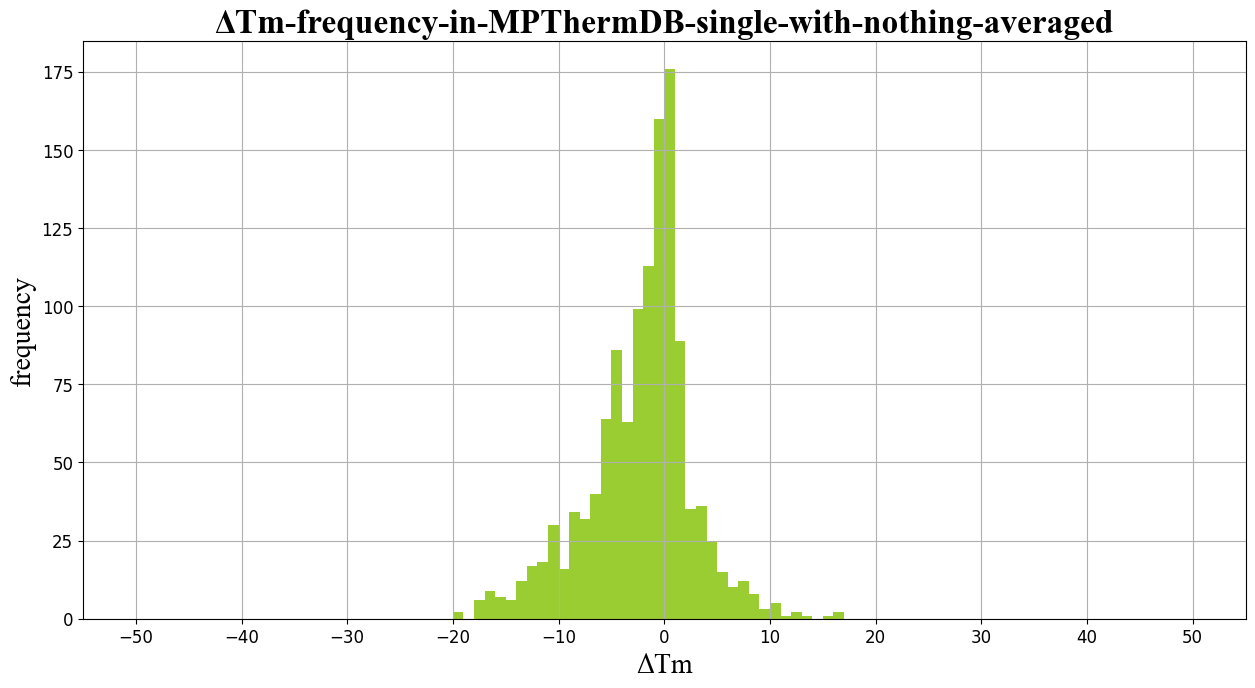

In [25]:
plt.figure(figsize=(15, 7.5), dpi=100)
plt.hist(avg_HotMusic["ΔTm"].astype(float).sort_values(),
         bins=100,
         color="yellowgreen",
         range=(-50, 50))
plt.xlabel("ΔTm", size=18)
plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(10))

# 标题与坐标轴标签
plt.title("ΔTm-frequency-in-MPThermDB-single-with-nothing-averaged",
          loc="center",
          fontdict={"family" : "Times New Roman",
                    "size" : 24,
                    "weight" : "bold"})
plt.xlabel("ΔTm", fontdict={"family" : "Times New Roman", "size" : 20, "weight" : "normal"})
plt.ylabel("frequency", fontdict={"family" : "Times New Roman", "size" : 20, "weight" : "normal"})

plt.xticks(size=12)
plt.yticks(size=12)
plt.rcParams["axes.facecolor"] = "white"
plt.grid()
plt.show()

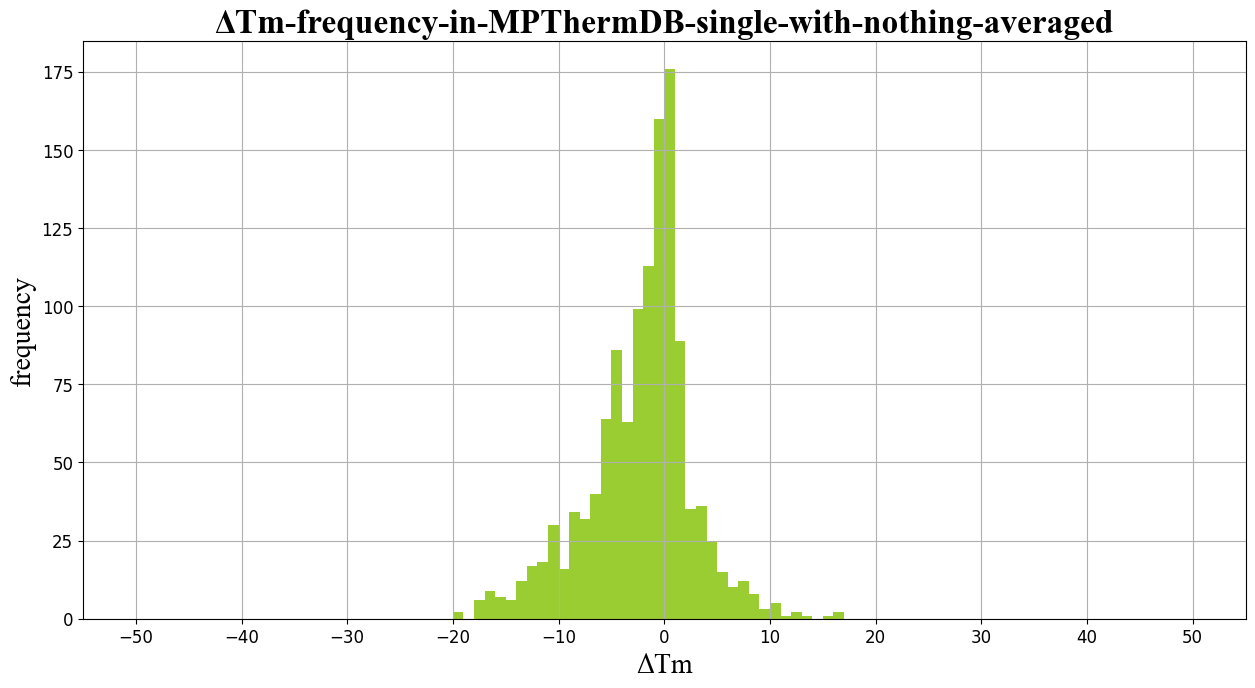

In [26]:
plt.figure(figsize=(15, 7.5), dpi=100)
plt.hist(avg_HotMusic["ΔTm"].astype(float).sort_values(),
         bins=100,
         color="yellowgreen",
         range=(-50, 50))
plt.xlabel("ΔTm", size=18)
plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(10))

# 标题与坐标轴标签
plt.title("ΔTm-frequency-in-MPThermDB-single-with-nothing-averaged",
          loc="center",
          fontdict={"family" : "Times New Roman",
                    "size" : 24,
                    "weight" : "bold"})
plt.xlabel("ΔTm", fontdict={"family" : "Times New Roman", "size" : 20, "weight" : "normal"})
plt.ylabel("frequency", fontdict={"family" : "Times New Roman", "size" : 20, "weight" : "normal"})

plt.xticks(size=12)
plt.yticks(size=12)
plt.rcParams["axes.facecolor"] = "white"
plt.grid()
plt.show()

# 5.各数据集之间的引用关系[以ProThermDB为基本数据集]

In [27]:
def Check4Dup(quote_df: pd.DataFrame, df: pd.DataFrame) -> list:
    def CreateDict(_df: pd.DataFrame) -> set:
        occur = set()
        for rowIndex, row in _df.iterrows():
            occur.add("@".join(map(str, row)))
        return occur

    def check(_df: pd.DataFrame, occur: set) -> list:
        indexs = []
        for rowIndex, row in _df[columns].iterrows():
            if "@".join(map(str, row)) in occur:
                indexs .append(rowIndex)
        return indexs

    mtdData = CreateDict(df[columns])  # 构建在MPTherm中出现过的数据集合
    return check(quote_df, mtdData)  # 检验有多少测试集数据出现在我们的数据集中，并返回处理后数据集

### 5.1.MPThermDB对ProThermDB的引用关系

In [28]:
MPThermDB_ProThermDb_duplicateIndex = Check4Dup(avg_ProThermDB, avg_MPThermDB)
print("MPThermDB采用了ProThermDB中的{}条数据".format(len(MPThermDB_ProThermDb_duplicateIndex)))

MPThermDB采用了ProThermDB中的51条数据


### 5.2.HotMuSiC对MPThermDB的引用关系[在缺失Tm条件的情况下进行比较]

In [29]:
HotMusic_MPThermDB_duplicateIndex = Check4Dup(avg_MPThermDB, avg_HotMusic)
print("HotMusic采用了MPThermDB中的{}条数据".format(len(HotMusic_MPThermDB_duplicateIndex)))

HotMusic采用了MPThermDB中的0条数据


### 5.3.HotMusic对ProThermDB的引用关系

In [30]:
HotMusic_ProThermDB_duplicateIndex = Check4Dup(avg_ProThermDB, avg_HotMusic)
print("HotMusic采用了ProThermDB中的{}条数据".format(len(HotMusic_ProThermDB_duplicateIndex)))

HotMusic采用了ProThermDB中的18条数据


# 6.为研究全全体球蛋白预测-在ProthermDB数据集中分割一个测试集

In [31]:
excllent_ProThermDB = avg_ProThermDB.copy()
excllent_ProThermDB = delete4Dup(excllent_ProThermDB, avg_MPThermDB, columns)
excllent_ProThermDB = delete4Dup(excllent_ProThermDB, avg_HotMusic, columns)
excllent_ProThermDB = delete4Dup(excllent_ProThermDB, MPTherm_pred_Training, columns[:2])
excllent_ProThermDB = delete4Dup(excllent_ProThermDB, MPTherm_pred_Testing, columns[:2])
excllent_ProThermDB

-前一数据集采用了后一数据集中的51条数据，现已删除
-前一数据集采用了后一数据集中的18条数据，现已删除
-前一数据集采用了后一数据集中的1条数据，现已删除
-前一数据集采用了后一数据集中的1条数据，现已删除


,UniProt_ID,Mutation,Tm,ΔTm
0,A0A060GYS1,H22R,88.0,9.9
1,A0A060GYS1,P224R,84.3,2.3
2,A0A410ZNC6,A341S,33.6,3.6
3,A0A410ZNC6,F184L,31.0,1.0
4,A0A410ZNC6,P250L,34.5,4.5
...,...,...,...,...
4676,R9S082,T52A,79.4,-2.8
4677,R9S082,T68A,81.7,-0.5
4678,R9S082,V115A,79.3,-2.9
4679,R9S082,V14A,80.9,-1.3


### 读取ProThermDB测试集

In [32]:
Common_Test = pd.read_csv("D:\WorkPath\PycharmProjects\MutTm-pred\Dataset\BasicData\ProThermDB\Common\excllent_ProThermDB_Testing4Comparison.csv")
Common_Test

,UniProt_ID,Mutation,ΔTm,PDB_Chain_Mutation,PDB_ID,Chain,PDB_Mutation,HotMuSiC,AUTO-MUTE2.0-AdaClass,AUTOMUTE2.0-SVM,AUTO-MUTE2.0-REPTree,AUTO-MUTE2.0-SVR,MPTherm-pred
0,P03050,S5A,-1.50,1arr_A:S5A,1arr,A,S5A,-4.19,-1,-1,-2.50,-1.50,-2.761
1,Q13526,T29A,-14.30,1pin_A:T29A,1pin,A,T29A,-8.83,-,-,-,-,-10.837
2,P07845,Y111N,0.00,1gwy_A:Y111N,1gwy,A,Y111N,-3.58,-1,-1,-2.70,-1.80,-5.861
3,P00711,D106N,19.60,1hfz_A:D87N,1hfz,A,D87N,-1.55,-,-,-,-,-7.088
4,Q15059,H395R,-2.60,3s92_A:H395R,3s92,A,H395R,-2.59,-,-,-,-,-7.988
...,...,...,...,...,...,...,...,...,...,...,...,...,...
262,P61495,H179K,-1.05,1osi_A:H179K,1osi,A,H179K,0.42,-1,-1,-15.21,-3.67,-1.236
263,P00044,F16M,-15.20,1ycc_A:F10M,1ycc,A,F10M,-3.94,-,-,-,-,-3.561
264,P00644,T144Q,-12.95,1stn_A:T62Q,1stn,A,T62Q,-2.91,-1,-1,-1.51,-5.19,-1.162
265,P05798,L21A,-1.60,1rgg_A:L21A,1rgg,A,L21A,-3.80,-1,1,-12.42,1.12,-6.895


### 为测试集填充数据条目

In [33]:
excllent_ProThermDB_Testing = select4Dup(excllent_ProThermDB, Common_Test, columns[:-1])

-前一数据集采用了后一数据集中的360条数据，现返回该重叠数据集


In [34]:
excllent_ProThermDB_Training = delete4Dup(excllent_ProThermDB, excllent_ProThermDB_Testing, columns)

-前一数据集采用了后一数据集中的360条数据，现已删除


In [35]:
# excllent_ProThermDB_Testing.to_csv("BasicData/ProThermDB/Tm/excllent_ProThermDB_Testing.csv", index=False)
# excllent_ProThermDB_Training.to_csv("BasicData/ProThermDB/Tm/excllent_ProThermDB_Training.csv", index=False)

# 7.拼接所有可用数据为PonDB

In [36]:
PonDB = pd.concat([avg_HotMusic, avg_MPThermDB, avg_ProThermDB], axis=0, ignore_index=True).drop_duplicates(subset=columns, keep=False).reset_index(drop=True)
PonDB = delete4Dup(PonDB, MPTherm_pred_Testing, columns[:-1])
PonDB = delete4Dup(PonDB, excllent_ProThermDB_Testing, columns)
PonDB

-前一数据集采用了后一数据集中的157条数据，现已删除
-前一数据集采用了后一数据集中的360条数据，现已删除


,UniProt_ID,Mutation,Tm,ΔTm
0,A8PUY1,N277D,54.6,2.0
1,A8PUY1,N277F,54.6,-16.3
2,A8PUY1,N277L,54.6,-12.0
3,A8PUY1,N277V,54.6,-13.5
4,D4Z2G1,A129V,51.0,-1.5
...,...,...,...,...
7052,R9S082,T52A,79.4,-2.8
7053,R9S082,T68A,81.7,-0.5
7054,R9S082,V115A,79.3,-2.9
7055,R9S082,V14A,80.9,-1.3


### 7.1.绘制图像

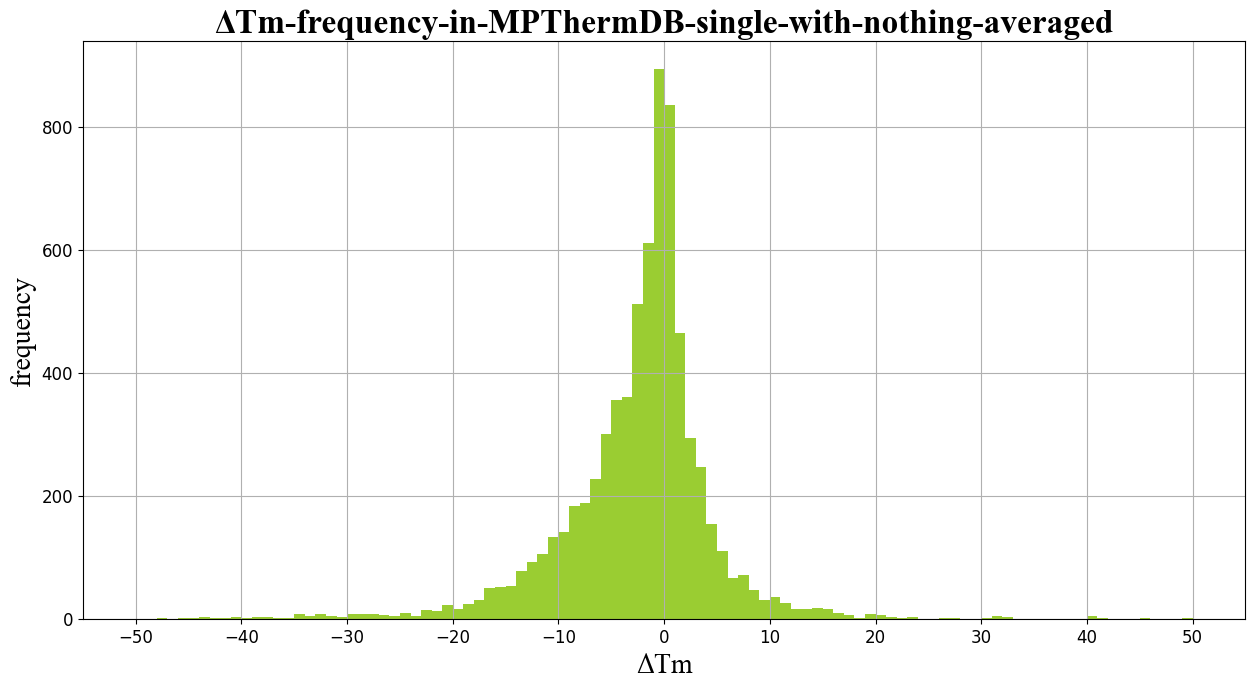

In [37]:
plt.figure(figsize=(15, 7.5), dpi=100)
plt.hist(PonDB["ΔTm"].astype(float).sort_values(),
         bins=100,
         color="yellowgreen",
         range=(-50, 50))
plt.xlabel("ΔTm", size=18)
plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(10))

# 标题与坐标轴标签
plt.title("ΔTm-frequency-in-MPThermDB-single-with-nothing-averaged",
          loc="center",
          fontdict={"family" : "Times New Roman",
                    "size" : 24,
                    "weight" : "bold"})
plt.xlabel("ΔTm", fontdict={"family" : "Times New Roman", "size" : 20, "weight" : "normal"})
plt.ylabel("frequency", fontdict={"family" : "Times New Roman", "size" : 20, "weight" : "normal"})

plt.xticks(size=12)
plt.yticks(size=12)
plt.rcParams["axes.facecolor"] = "white"
plt.grid()
plt.show()

### 7.2.PonDB全数据为训练集

In [38]:
# PonDB.to_csv("BasicData/PonDB/Tm/PonDB.csv", index=False)

In [39]:
PonDB["ΔTm"].var()

56.31848715302654